# Machine Learning Labwork (1 - 10).
<li>Prepared by: Shraddha Vasa</li>
<ol>MSc. Data Science (III)</ol>
<li>Roll number: 121922502020</li>


In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

<h1> 1. Creating a Data Frame in Pandas from csv files.

In [2]:
cc=pd.read_csv("hiringjob.csv")
cc.sample(3)

,Name,Age,Hire Date,Job,salary($)
7,Bhargav,21.0,11-01-2019,Python Developer,NaN
2,Krishna,21.0,16-06-2019,Data Analyst,NaN
6,Narendra,NaN,NaN,NaN,72000.0


<h1> 2. Importing Data with Pandas – adding columns to the data
frame.

In [3]:
print('Before Adding columns:')
print(cc.head(3))
print()
print('After Adding columns')
cc.insert(2,column="Dept", value="MSc")
print(cc.head(3))

Before Adding columns:
      Name    Age   Hire Date            Job  salary($)
0  Shraddha  23.0  03-07-2018  Web Developer    50000.0
1   Lohitha  22.0         NaN   HR Assistant    45000.0
2   Krishna  21.0  16-06-2019   Data Analyst        NaN

After Adding columns
      Name    Age Dept   Hire Date            Job  salary($)
0  Shraddha  23.0  MSc  03-07-2018  Web Developer    50000.0
1   Lohitha  22.0  MSc         NaN   HR Assistant    45000.0
2   Krishna  21.0  MSc  16-06-2019   Data Analyst        NaN


<h1> 3. Handling Missing Data- drop, fill, aggregate functions.
    

<b> Dropna</b>

In [4]:
cc.dropna()

,Name,Age,Dept,Hire Date,Job,salary($)
0,Shraddha,23.0,MSc,03-07-2018,Web Developer,50000.0
3,Pavani,21.0,MSc,27-02-2019,Manager,65000.0


In [5]:
cc.dropna(axis=1)

,Name,Dept
0,Shraddha,MSc
1,Lohitha,MSc
2,Krishna,MSc
3,Pavani,MSc
4,Vikas,MSc
5,Vijaya,MSc
6,Narendra,MSc
7,Bhargav,MSc


In [6]:
cc.dropna(thresh=2)

,Name,Age,Dept,Hire Date,Job,salary($)
0,Shraddha,23.0,MSc,03-07-2018,Web Developer,50000.0
1,Lohitha,22.0,MSc,NaN,HR Assistant,45000.0
2,Krishna,21.0,MSc,16-06-2019,Data Analyst,NaN
3,Pavani,21.0,MSc,27-02-2019,Manager,65000.0
4,Vikas,NaN,MSc,02-08-2018,Director,70000.0
5,Vijaya,20.0,MSc,24-12-2019,Java Developer,NaN
6,Narendra,NaN,MSc,NaN,NaN,72000.0
7,Bhargav,21.0,MSc,11-01-2019,Python Developer,NaN


<b>Fillna</b>

In [7]:
cc.fillna(0)
cc["Job"].fillna("None", inplace = True)
cc["Age"].fillna("None", inplace = True)
cc["Hire Date"].fillna("None", inplace = True)
print(cc)

      Name    Age Dept   Hire Date               Job  salary($)
0  Shraddha    23  MSc  03-07-2018     Web Developer    50000.0
1   Lohitha    22  MSc        None      HR Assistant    45000.0
2   Krishna    21  MSc  16-06-2019      Data Analyst        NaN
3    Pavani    21  MSc  27-02-2019          Manager     65000.0
4    Vikas   None  MSc  02-08-2018          Director    70000.0
5    Vijaya    20  MSc  24-12-2019    Java Developer        NaN
6  Narendra  None  MSc        None              None    72000.0
7   Bhargav    21  MSc  11-01-2019  Python Developer        NaN


<b>Aggregate Functions</b>

In [8]:
cc.groupby(['salary($)']).agg(['count'])


,Name,Age,Dept,Hire Date,Job
,count,count,count,count,count
salary($),,,,,
45000.0,1,1,1,1,1
50000.0,1,1,1,1,1
65000.0,1,1,1,1,1
70000.0,1,1,1,1,1
72000.0,1,1,1,1,1


In [9]:
cc.describe()

,salary($)
count,5.000000
mean,60400.000000
std,12177.848743
min,45000.000000
25%,50000.000000
50%,65000.000000
75%,70000.000000
max,72000.000000


<h1>4. Indexing Data Frames with Pandas, Indexing Using Labels in Pandas</h1>

In [10]:
# Creating a dataframe with 3 rows and two features {A,B}.
df = pd.DataFrame(data = np.random.randint(0,50, size = (3,2)),columns = ['A', 'B'])


In [11]:
# Indexing the dataframe.
print('Default indexing:')
print(df)
print()

Default indexing:
    A   B
0   9  21
1  13   4
2  17  11



In [12]:
print('Changing index to dates:')
dates = pd.date_range(start = '1/1/2020', periods = 3)
df.index = dates
print(df)
print()


Changing index to dates:
             A   B
2020-01-01   9  21
2020-01-02  13   4
2020-01-03  17  11



In [13]:
print('Changing index to Student names:')
names = ['April', 'May', 'Alica']
df.index = names
print(df)
print()


Changing index to Student names:
        A   B
April   9  21
May    13   4
Alica  17  11



In [14]:
print('Switching the index to default values:')
df.reset_index(drop = True, inplace = True)
print(df)
print()


Switching the index to default values:
    A   B
0   9  21
1  13   4
2  17  11



In [15]:
# Indexing using labels.
print('Using column A as our index:')
df.set_index(keys = 'A', drop = True, inplace = True)
print(df)
print()

Using column A as our index:
     B
A     
9   21
13   4
17  11



# 5. Exploratory Data Analysis with Pandas- for both one dimensional and two dimensional data (series or data frames) - describe, group data, ANOVA, correlation and correlation methods, rank.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dl = pd.read_csv('fifa.csv')
dl.head()

,Date,ARG,BRA,ESP,FRA,GER,ITA
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


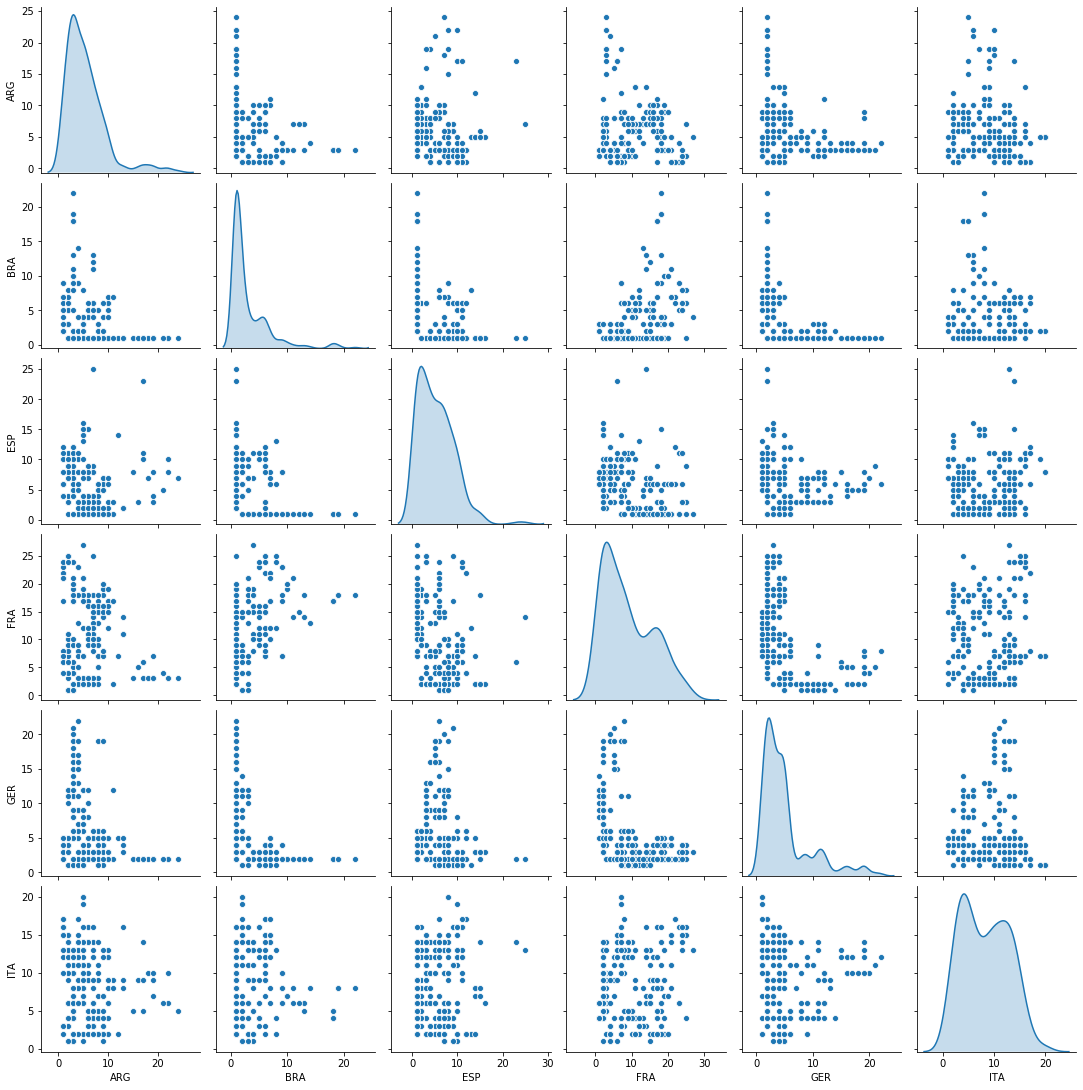

In [18]:
sns.pairplot(dl, diag_kind = 'kde')


In [19]:
 dl.describe()

,ARG,BRA,ESP,FRA,GER,ITA
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,5.454545,3.171329,5.321678,8.958042,5.104895,8.353147
std,4.012659,3.620897,3.908787,6.822948,4.354813,4.514822
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.000000,3.000000,2.000000,4.000000
50%,5.000000,1.500000,5.000000,7.000000,4.000000,8.000000
75%,7.000000,4.000000,8.000000,15.000000,5.000000,12.000000
max,24.000000,22.000000,25.000000,27.000000,22.000000,20.000000


In [20]:
gk = dl.groupby('Date')
gk.first()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...
2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
lm = ols('FRA ~ BRA',data=dl).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df       sum_sq      mean_sq           F        PR(>F)
BRA         1.0  3785.666992  3785.666992  113.388395  1.683242e-22
Residual  284.0  9481.829511    33.386724         NaN           NaN


In [23]:
 from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [24]:
corr, _ = pearsonr(dl['FRA'], dl['BRA'])
print('Pearsons correlation: %.3f' % corr)
corr1, _ = spearmanr(dl['FRA'], dl['BRA'])
print('Spearmans correlation: %.3f' % corr1)

Pearsons correlation: 0.534
Spearmans correlation: 0.570


In [25]:
result = dl.rank()
print(result)

      Date    ARG    BRA    ESP    FRA    GER    ITA
0      1.0  156.5  263.0  276.0  198.5   14.5   17.0
1      2.0  270.0   72.0  278.5  140.0  192.0   17.0
2      3.0  249.0   72.0  197.5  208.0  151.5   36.5
3      4.0  249.0  211.0  197.5  217.0  113.0    3.5
4      5.0  233.5  195.0  149.0  217.0   14.5   17.0
..     ...    ...    ...    ...    ...    ...    ...
281  282.0  124.5  164.5  171.5  170.5   14.5  251.5
282  283.0  124.5  164.5  171.5  170.5   14.5  251.5
283  284.0  156.5  164.5  219.5  140.0   14.5  285.5
284  285.0  156.5  164.5  219.5  140.0   14.5  285.5
285  286.0  156.5  164.5  253.0  140.0   14.5  284.0

[286 rows x 7 columns]


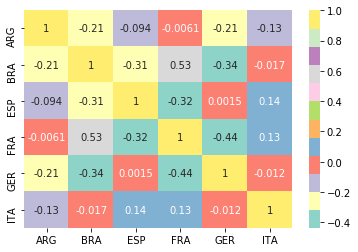

In [26]:
# Creating a Correlation matrix.
corr = dl.corr()
# Heatmap.
sns.heatmap(corr, cmap = 'Set3', annot = True)


# 6. Calculating Mean, Trimmed Mean, Weighted Mean, Median.

In [27]:
iris=pd.read_csv("iris.csv")

In [28]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
iris.mean()

sepallength    5.843333
sepalwidth     3.054000
petallength    3.758667
petalwidth     1.198667
dtype: float64

In [31]:
from scipy.stats import tmean
T_mean = dict()
for col in iris.columns.values[:-1]:
    # Lower Quartile (P25).
    p25 = np.percentile(iris[col].values, q = 25)
    # Upper Quartile (P75).
    p75 = np.percentile(iris[col].values, q = 75)
    # Trimmed Mean.
    T_mean[col] = round(tmean(iris[col].values, (p25, p75)), 3)
print('Trimmed Mean:')
print(T_mean)

Trimmed Mean:
{'sepallength': 5.775, 'sepalwidth': 3.022, 'petallength': 3.978, 'petalwidth': 1.217}


In [32]:
def weighted_mean(arr, weights):
    n = len(arr)
    return round(np.sum(arr * weights)/n, 3)


# Assigning random weights to the features.
weights = dict()
for col in iris.columns.values[:-1]:
    weights['weight' + str(col)] = np.random.randint(0,10, len(iris[col])) / 10
    # Calculating the weighted mean for each numeric feature.
    print('For ', col)
    print(weighted_mean(iris[col],
                    weights['weight' + str(col)]))

For  sepallength
2.578
For  sepalwidth
1.477
For  petallength
1.518
For  petalwidth
0.531


In [33]:
iris.median()

sepallength    5.80
sepalwidth     3.00
petallength    4.35
petalwidth     1.30
dtype: float64

# 7. Plotting using pandas- Exploratory analysis based on the plots

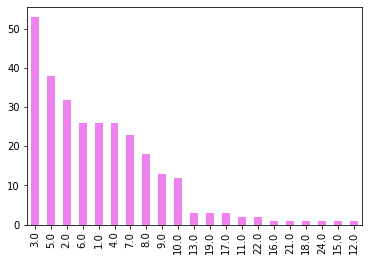

In [34]:
dl['ARG'].value_counts().plot(kind = 'bar', color = 'violet')
plt.show()

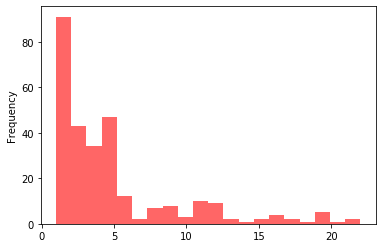

In [35]:
dl['GER'].plot(kind = 'hist', color = 'red', bins = 20, alpha= .6)
plt.show()

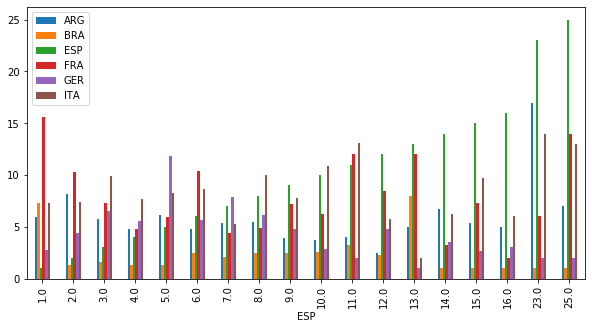

In [36]:
grouped_data = dl.groupby('ESP')[dl.columns.values].mean()
grouped_data.plot(kind = 'bar', figsize = (10,5))

plt.show()


# 8. Data Visualization with different charts in python.


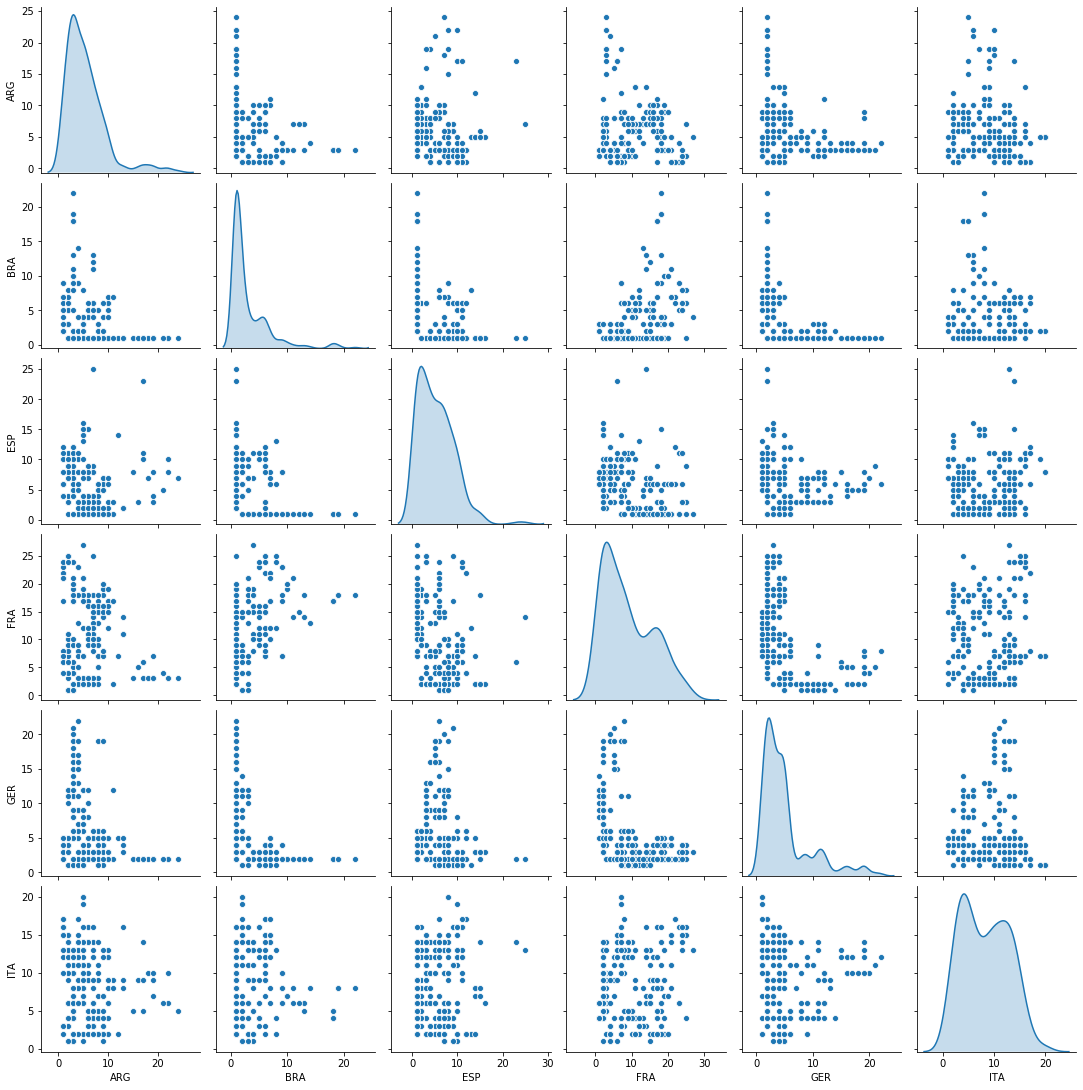

In [37]:
sns.pairplot(dl, diag_kind = 'kde')
plt.show()

# 9. Apply PCA function. Find Eigen Values and Eigen Vectors

In [38]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [39]:
A = array([[23,12], [43, 34], [51, 65]])
print(A)

[[23 12]
 [43 34]
 [51 65]]


In [40]:
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)


[39. 37.]


In [41]:
# center columns by subtracting column means
C = A - M
print(C)

[[-16. -25.]
 [  4.  -3.]
 [ 12.  28.]]


In [42]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[208. 362.]
 [362. 709.]]


In [43]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)


[[-0.8857293  -0.46420212]
 [ 0.46420212 -0.8857293 ]]
[ 18.27931671 898.72068329]


In [44]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[  2.56661576  29.57046641]
 [ -4.93552356   0.80037941]
 [  2.3689078  -30.37084582]]


# 10. Working with JSON Data with python.

In [45]:
 # Python program showing
# use of json package
import json
# {key:value mapping}
a ={"name":"Shraddha",
    "age":23,
    "Salary":340000,
    "dept":"MSc"}
# conversion to JSON done by dumps() function
b = json.dumps(a)
# printing the output
print(b)

{"name": "Shraddha", "age": 23, "Salary": 340000, "dept": "MSc"}


In [46]:
# Python program showing that
# json support different primitive
# types
import json
# list conversion to Array
print(json.dumps(['Welcome', "to", "Msc Data Science"]))

["Welcome", "to", "Msc Data Science"]


In [47]:
# tuple conversion to Array
print(json.dumps(("Welcome", "to", "Third Semester")))

["Welcome", "to", "Third Semester"]


In [48]:
# string conversion to String
print(json.dumps("Bonjour"))

"Bonjour"


In [49]:
# int conversion to Number
print(json.dumps(345678))

345678


In [50]:
# float conversion to Number
print(json.dumps(212.32))

212.32


In [51]:
# Boolean conversion to their respective values
print(json.dumps(True))
print(json.dumps(False))

true
false


In [52]:
# None value to null
print(json.dumps(None))

null
